# Figure S02: Differences in susceptibility among 195 C. elegans strains

to 26 environmental toxicant conditions

In [ ]:

library(data.table)
library(dplyr)



Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'ggh4x'

The following object is masked from 'package:ggplot2':

    guide_axis_logticks

here() starts at /Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows


Attaching package: 'flextable'

The following objects are masked from 'package:kableExtra':

    as_image, footnote

$strain_table
$strain_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.html"

$strain_table$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.tsv.zip"

$strain_table$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.docx"

$strain_table$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.csv"


$tox_table_ft
$tox_table_ft$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.html"

$tox_table_ft$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.tsv.zip"

$tox_table_ft$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.docx"

$tox_table_ft$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.csv"


$trait_table
$trait_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S3/table_S3.html"

$trait_table$tsv
[1] "

# Inputs

In [ ]:
#### Inputs ####
strain_means <- readRDS(file.path("data", "processed", "phenotypes", "strain_means.rds"))
drug_means <- readRDS(file.path("data", "processed", "phenotypes", "drug_means.rds"))

class.pal.df <- tibble::tibble(
  col = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00"),
  big_class = c("Flame Retardant", "Fungicide", "Herbicide", "Insecticide", "Metal")
)

strain_means_out <- strain_means %>%
  dplyr::left_join(drug_means, by = "drug") %>%
  dplyr::mutate(
    ResponderType = case_when(
      StrainMean_NormLength > twoSD_pos ~ "High",
      StrainMean_NormLength < twoSD_neg ~ "Low",
      TRUE ~ "Normal"
    ),
    big_class = factor(big_class, levels = class.pal.df$big_class)
  )

res_col_pal <- c("Low" = "#FF0000", "Normal" = "grey", "High" = "#0000FF")
man_pal <- class.pal.df %>% dplyr::pull(col)
strip_colors <- setNames(man_pal, class.pal.df$big_class)

strip_y <- ggh4x::strip_themed(
  background_y = ggh4x::elem_list_rect(
    fill = strip_colors[levels(strain_means_out$big_class)]
  ),
  text_y = ggh4x::elem_list_text(face = "bold", size = 12)
)

strain_means_plot <- strain_means_out %>%
  dplyr::mutate(nice_drug_label2 = stringr::str_replace(nice_drug_label2, "uM", "µM")) %>%
  ggplot2::ggplot(aes(x = StrainMean_NormLength, y = nice_drug_label2)) +
  ggplot2::geom_jitter(aes(color = ResponderType), alpha = 0.8, width = 0.2, height = 0.2) +
  ggplot2::geom_boxplot(outliers = FALSE) +
  ggh4x::facet_grid2(big_class ~ ., scales = "free_y", strip = strip_y) +
  scale_color_manual(
    values = res_col_pal,
    labels = c("Low" = "Highly susceptible", "Normal" = "Moderately susceptible", "High" = "Minimally susceptible")
  ) +
  ggplot2::labs(x = "Normalized animal length (µm)", color = "Response type") +
  pub_theme() +
  theme(axis.title.y = ggplot2::element_blank(), legend.position = "top")


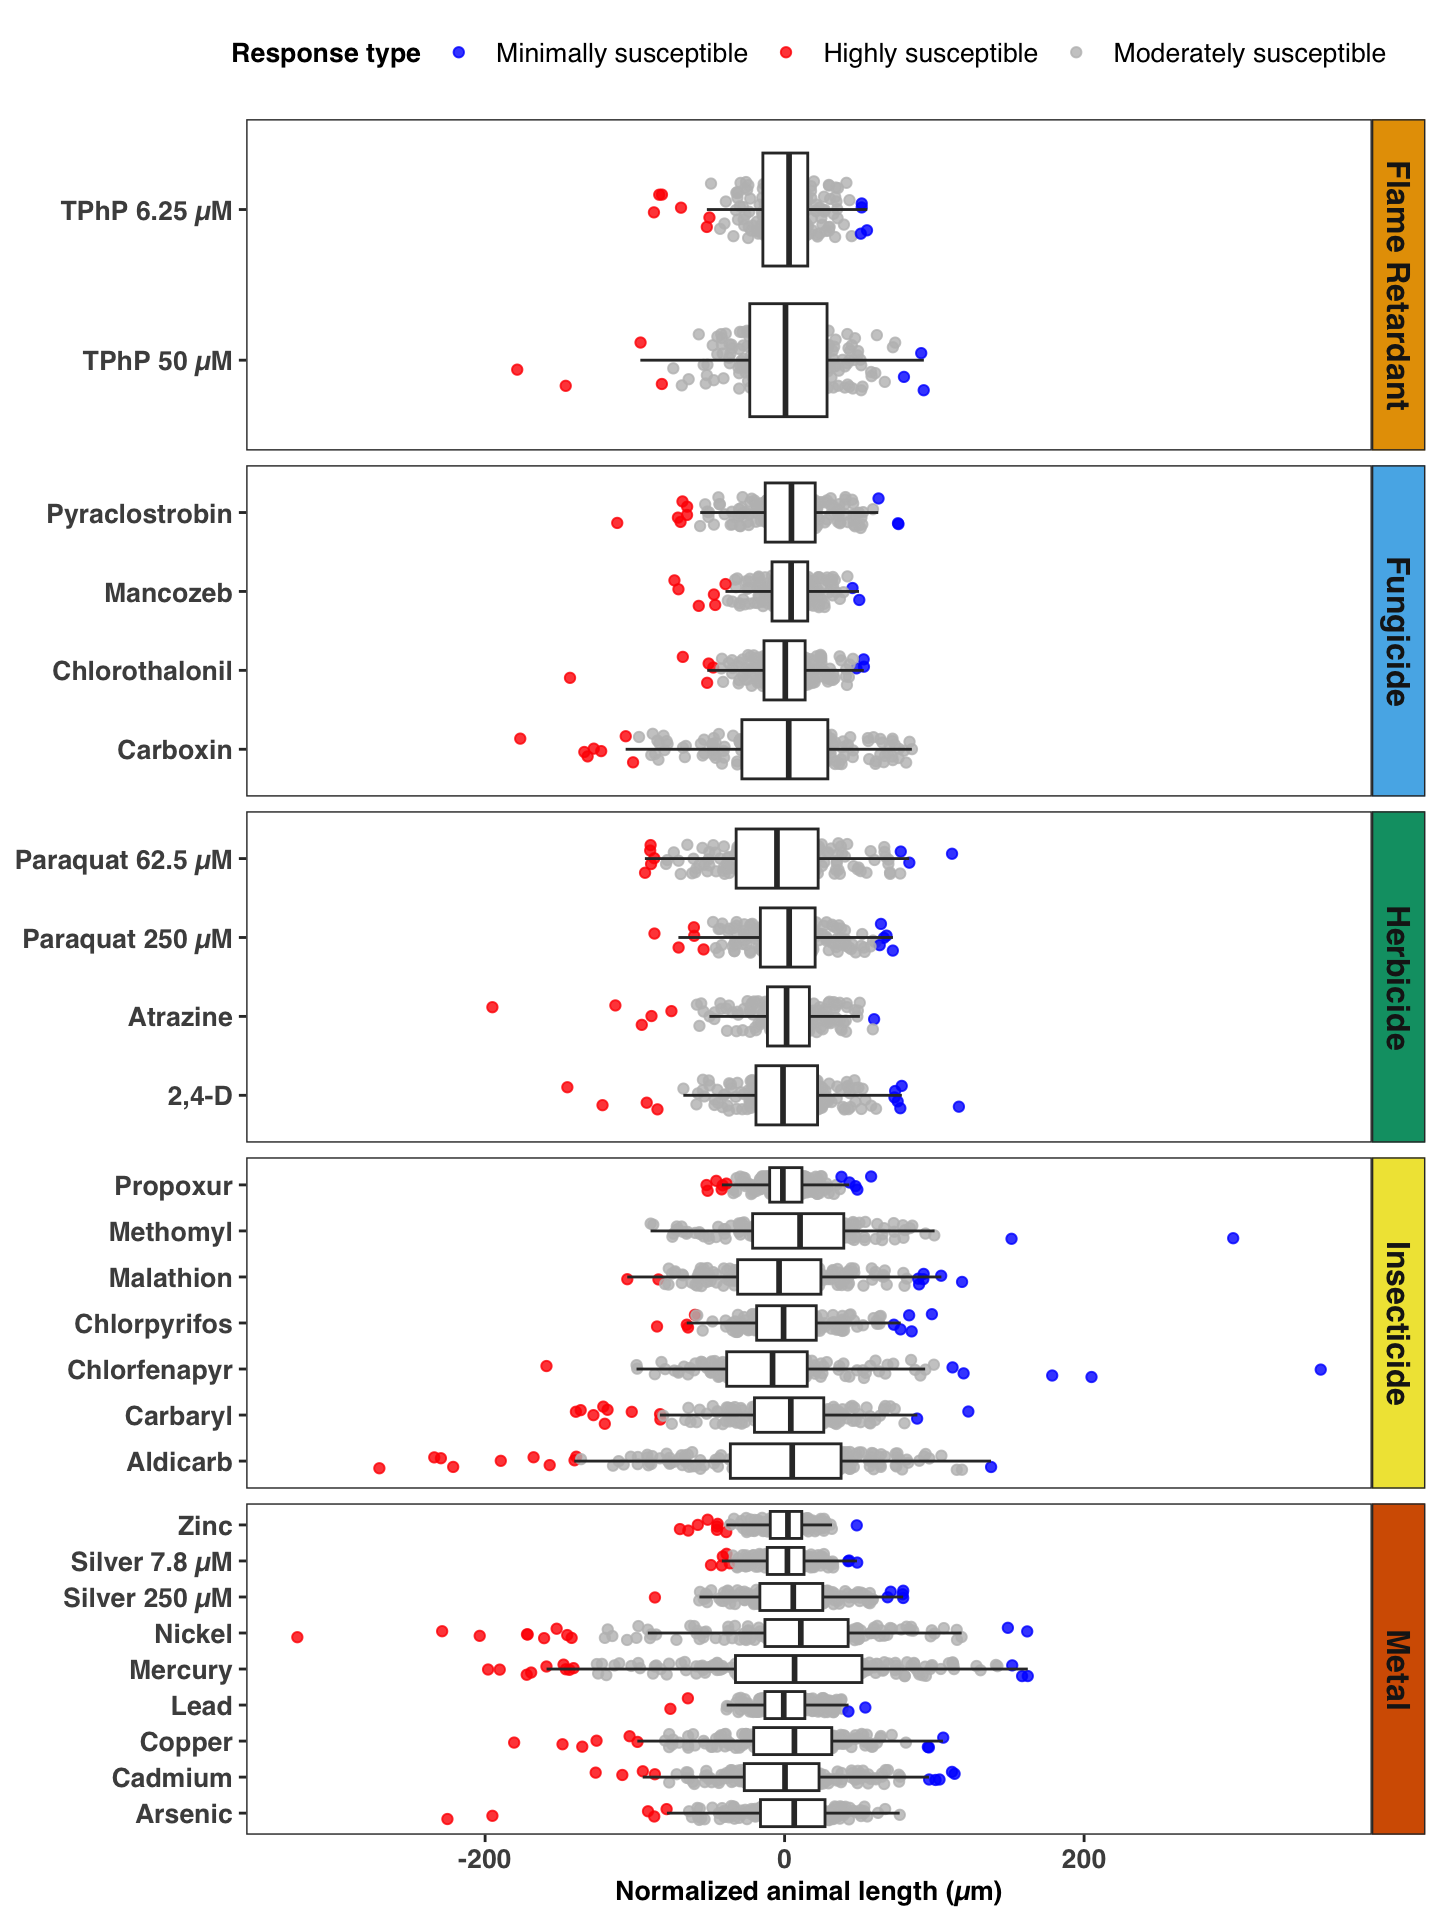

In [ ]:
strain_means_plot


Save the plot

In [ ]:
save_plot(strain_means_plot, sup_figure_fns$strain_means_plot, w_in = 7.5, h_in = 10)


Warning in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
semi-transparency is not supported on this device: reported only once per page